In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style
from matplotlib import pyplot as plt

### Data Preprocessing

In [2]:
raw_df = pd.read_csv('spotify_tracks_dataset.csv')

In [3]:
df = raw_df.copy()

# Remove null row
df.dropna(inplace=True)

# Remove "Unnamed: 0" field, and remove any duplicate tracks
df = df.drop(columns = ["Unnamed: 0"])
df = df.drop_duplicates()

# Keep tracks with only 1 labeled genre
num_tracks_ids = df['track_id'].value_counts()
single_tracks_ids = num_tracks_ids[num_tracks_ids==1].index.tolist()
df = df[df['track_id'].isin(single_tracks_ids)]
print(df.shape)

(73441, 20)


(59605, 20)


C:\Users\rexca\.conda\envs\python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


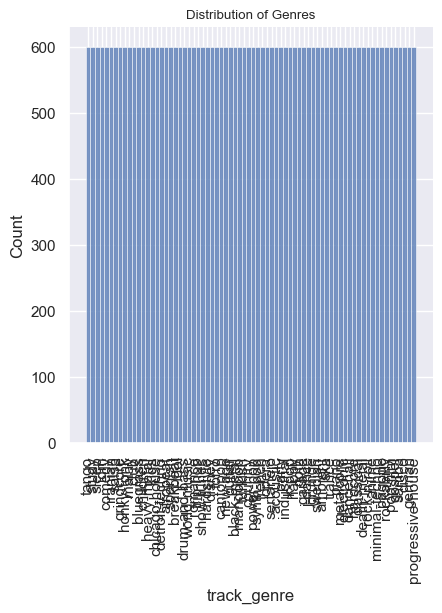

In [4]:
# Create an equal distribution of Genres

# Get list of genres that have more than 600 tracks
genre_counts = df['track_genre'].value_counts()
genre_list = genre_counts[genre_counts>600].index

# Filter data to only include genres from our new genre_list
df = df[df['track_genre'].isin(genre_list)]
print(df.shape)

# Truncate each genre to 600 tracks to create an equal distribution
cols = df.columns
df_cleaned = pd.DataFrame(columns=cols)

for genre in genre_list:
    df_cleaned = pd.concat([df_cleaned, df[df['track_genre'] == genre][0:600]], ignore_index=True)

# Plot the distribution of genres
sns.displot(df_cleaned['track_genre'])
sns.set_context("paper")
plt.title('Distribution of Genres')
plt.xticks(rotation=90)
plt.show()

In [6]:
# Drop unncessary fields
df_cleaned = df_cleaned.drop(columns = ["track_id", "artists", "album_name","track_name","time_signature"])

# Map explicit field to binary
df_cleaned['explicit'] = df_cleaned['explicit'].apply(lambda x: 1 if x == True else 0)

# One hot encode key field
df_cleaned = pd.get_dummies(df_cleaned, columns=['key'], dtype=int)
df_cleaned = df_cleaned.rename(columns={"key_0":"C","key_1":"C#","key_2":"D","key_3":"D#","key_4":"E","key_5":"F",
                        "key_6":"F#","key_7":"G","key_8":"G#","key_9":"A","key_10":"A#","key_11":"B"})

print(df_cleaned.shape)
df_cleaned.head()

(43200, 26)


,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,D,D#,E,F,F#,G,G#,A,A#,B
0,32,123626,0,0.525,0.412,-13.790,0,0.0600,0.996,0.008260,...,0,0,0,1,0,0,0,0,0,0
1,28,156223,0,0.435,0.349,-12.048,0,0.0598,0.875,0.010400,...,0,0,0,0,1,0,0,0,0,0
2,37,266373,0,0.423,0.301,-11.091,1,0.2630,0.928,0.000005,...,0,0,0,0,0,0,0,0,0,0
3,31,158533,0,0.479,0.218,-13.826,0,0.0406,0.981,0.939000,...,1,0,0,0,0,0,0,0,0,0
4,28,221934,0,0.383,0.251,-13.056,1,0.0442,0.826,0.000000,...,0,0,0,0,0,0,0,0,0,0


### Modeling Next Steps
* Decision Trees
* KNN
* Logistic Regression / NN


In [73]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

n_clusters = 20
random_state = 1

df_cluster = df_cleaned.copy()

X = df_cluster.drop('track_genre', axis=1)
y = df_cluster['track_genre']


def fit_kmeans(X, n_clusters, random_state):
  ## YOUR CODE HERE ## 
  model = KMeans(n_clusters=n_clusters, random_state=random_state)
  return model.fit(X)

model = fit_kmeans(X, n_clusters, random_state)

## get cluster prediction and add to DataFrame
df_cluster['cluster'] = model.predict(X)
df_cluster


C:\Users\rexca\.conda\envs\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,D#,E,F,F#,G,G#,A,A#,B,cluster
0,32,123626,0,0.525,0.412,-13.790,0,0.0600,0.996000,0.008260,...,0,0,1,0,0,0,0,0,0,6
1,28,156223,0,0.435,0.349,-12.048,0,0.0598,0.875000,0.010400,...,0,0,0,1,0,0,0,0,0,0
2,37,266373,0,0.423,0.301,-11.091,1,0.2630,0.928000,0.000005,...,0,0,0,0,0,0,0,0,0,19
3,31,158533,0,0.479,0.218,-13.826,0,0.0406,0.981000,0.939000,...,0,0,0,0,0,0,0,0,0,0
4,28,221934,0,0.383,0.251,-13.056,1,0.0442,0.826000,0.000000,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43195,50,178537,1,0.677,0.860,-2.707,0,0.0376,0.497000,0.007560,...,0,0,0,1,0,0,0,0,0,7
43196,45,196571,0,0.712,0.646,-4.230,1,0.1820,0.116000,0.000000,...,0,0,1,0,0,0,0,0,0,16
43197,47,179955,0,0.514,0.926,-3.188,0,0.0317,0.000845,0.034500,...,0,0,1,0,0,0,0,0,0,7
43198,55,175238,0,0.585,0.860,-3.836,1,0.0450,0.080200,0.000000,...,0,0,0,0,0,1,0,0,0,7


In [74]:
df_cluster['cluster'].value_counts()

cluster
16    6492
7     6267
4     5924
0     4901
19    4636
12    3558
6     2908
17    2358
8     1737
1     1682
11    1280
5      778
14     398
9      176
18      62
2       16
15      12
13       6
10       5
3        4
Name: count, dtype: int64

In [75]:
cluster_dict = dict()
for genre in df_cluster['track_genre'].unique():
    cluster_dict[genre] = df_cluster[df_cluster['track_genre'] == genre]['cluster'].mode()[0]
print_cluster_dict = dict()
for genre in cluster_dict:
    cluster = cluster_dict[genre]
    if cluster not in print_cluster_dict:
        print_cluster_dict[cluster] = [genre]
    else:
        print_cluster_dict[cluster].append(genre)
print_cluster_dict

{7: ['tango',
  'bluegrass',
  'romance',
  'hardstyle',
  'forro',
  'guitar',
  'french',
  'sertanejo',
  'party',
  'garage',
  'j-dance',
  'swedish',
  'electronic',
  'progressive-house'],
 6: ['study', 'kids', 'anime'],
 8: ['sleep', 'grindcore', 'children', 'disney', 'classical'],
 19: ['idm',
  'malay',
  'heavy-metal',
  'breakbeat',
  'j-idol',
  'drum-and-bass',
  'new-age',
  'mandopop',
  'synth-pop'],
 0: ['comedy',
  'honky-tonk',
  'power-pop',
  'piano',
  'rock-n-roll',
  'rockabilly',
  'german'],
 17: ['iranian', 'pop-film'],
 12: ['salsa', 'world-music', 'black-metal', 'gospel'],
 4: ['club',
  'afrobeat',
  'trip-hop',
  'cantopop',
  'acoustic',
  'industrial',
  'goth',
  'grunge',
  'metalcore',
  'death-metal',
  'samba',
  'disco'],
 11: ['chicago-house', 'detroit-techno', 'trance', 'minimal-techno'],
 16: ['spanish',
  'show-tunes',
  'turkish',
  'country',
  'opera',
  'k-pop',
  'happy',
  'ambient',
  'ska',
  'dancehall',
  'hardcore',
  'pagode']}

In [72]:
random_state = 1
X = df_cluster.drop(['cluster', 'track_genre', 'C', 'C#', 'D', 'D#',
       'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'], axis=1)
y = df_cluster['cluster']

#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=random_state)
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=random_state)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

for i in [2, 4, 8, 16, 32, 64]:
    print(f"{i} nearest neighbors")
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

2 nearest neighbors
Accuracy: 0.480787037037037
4 nearest neighbors
Accuracy: 0.5009259259259259
8 nearest neighbors
Accuracy: 0.4994212962962963
16 nearest neighbors
Accuracy: 0.4960648148148148
32 nearest neighbors
Accuracy: 0.48865740740740743
64 nearest neighbors
Accuracy: 0.4587962962962963


In [44]:
genre_mapping = pd.read_csv('genre_mapping.csv')
genre_mapping_dict = dict(zip(genre_mapping['All Genres'],genre_mapping['Parent']))

df2 = df_cleaned.copy()
df2['music_category'] = df2['track_genre'].apply(lambda x: genre_mapping_dict.get(x, 'Other'))
df2 = df2.drop(['track_genre'], axis=1)

{'acoustic': 'Other', 'afrobeat': 'Other', 'alt-rock': 'Rock', 'alternative': 'Rock', 'ambient': 'Other', 'anime': 'Other', 'black-metal': 'Metal', 'bluegrass': 'Country', 'blues': 'Other', 'brazil': 'Latin', 'breakbeat': 'Electronic', 'british': 'Other', 'cantopop': 'Pop', 'chicago-house': 'Electornic', 'children': 'Other', 'chill': 'Other', 'classical': 'Classical', 'club': 'Electronic', 'comedy': 'Other', 'country': 'Country', 'dance': 'Other', 'dancehall': 'Latin', 'death-metal': 'Metal', 'deep-house': 'Electronic', 'detroit-techno': 'Electronic', 'disco': 'Funk and Disco', 'disney': 'Other', 'drum-and-bass': 'Electronic', 'dub': 'Other', 'dubstep': 'Electronic', 'edm': 'Electronic', 'electro': 'Electronic', 'electronic': 'Electronic', 'emo': 'Rock', 'folk': 'Other', 'forro': 'Latin', 'french': 'Other', 'funk': 'Funk and Disco', 'garage': 'Other', 'german': 'Other', 'gospel': 'Other', 'goth': 'Rock', 'grindcore': 'Rock', 'groove': 'Funk and Disco', 'grunge': 'Rock', 'guitar': 'Othe

In [45]:
X = df2.drop(['music_category', 'C', 'C#', 'D', 'D#',
       'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'], axis=1)
y = df2['music_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

for i in [2, 4, 8, 16, 32, 64]:
    print(f"{i} nearest neighbors")
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

2 nearest neighbors
Accuracy: 0.5267361111111111
4 nearest neighbors
Accuracy: 0.5777777777777777
8 nearest neighbors
Accuracy: 0.596875
16 nearest neighbors
Accuracy: 0.5988425925925925
32 nearest neighbors
Accuracy: 0.5998842592592593
64 nearest neighbors
Accuracy: 0.5961805555555556


In [59]:
df3 = df2.copy()
df3['music_category'] = df3['music_category'].apply(lambda x: 'Other' if x == 'Classical' else x)
df3['music_category'] = df3['music_category'].apply(lambda x: 'Other' if x == 'Country' else x)
df3['music_category'] = df3['music_category'].apply(lambda x: 'Other' if x == 'Metal' else x)

In [60]:
X = df3.drop(['music_category', 'C', 'C#', 'D', 'D#',
       'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'], axis=1)
y = df3['music_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

for i in [2, 4, 8, 16, 32, 64]:
    print(f"{i} nearest neighbors")
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

2 nearest neighbors
Accuracy: 0.6002314814814815
4 nearest neighbors
Accuracy: 0.6511574074074075
8 nearest neighbors
Accuracy: 0.6719907407407407
16 nearest neighbors
Accuracy: 0.6778935185185185
32 nearest neighbors
Accuracy: 0.6849537037037037
64 nearest neighbors
Accuracy: 0.6761574074074074
